# percolation simulation in a random finite lattice

here i will simulate a percolation process with the following scheme:

- fist i will simulate the expancion of one cluster, starting from a single point.

- than I will consider the case in witch different clusters can interact.


In [49]:
#%matplotlib Tk
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
from IPython.display import clear_output
from matplotlib.animation import FuncAnimation, ArtistAnimation

plt.style.use('seaborn-pastel')

In [125]:
def print_cluster(cluster, radius):
    x = cluster[0,:] * np.cos(cluster[1,:])
    y = cluster[0,:] * np.sin(cluster[1,:])
    ax = plt.gca()
    ax.plot(x, y, "o", color="black")
    circ = plt.Circle((0,0), radius, color='b', fill=False)
    ax.add_patch(circ)
    ax.set_xlim([-radius,radius])
    ax.set_ylim([-radius,radius])
    plt.show()
    return

def N_interacting_points(cluster, radius_shell, delta_shell):
    N=0
    for i in range(len(cluster[0,:])):
        for j in range(i+1, len(cluster[0,:])):
            if (cluster[0,i]-cluster[0,j])>radius_shell:
                break
            x_i = cluster[0,i]*np.cos(cluster[1,i])
            x_j = cluster[0,j]*np.cos(cluster[1,j])
            y_i = cluster[0,i]*np.sin(cluster[1,i])
            y_j = cluster[0,j]*np.sin(cluster[1,j])
            distance = np.sqrt((x_i-x_j)**2 + (y_i - y_j)**2)
            if distance < radius_shell and distance > (radius_shell-delta_shell):
                plt.plot([x_i,x_j], [y_i, y_j], color="blue")
                N = N+1
    return N

In [151]:
radius_space = 60
radius_shell = 6
delta_shell = 0.2
N_points = 2000

random_r = (np.random.random(N_points) + np.random.random(N_points)) *radius_space
random_r = [random_r[i] if random_r[i] < radius_space else 2*radius_space-random_r[i] for i in range(len(random_r))]
cluster = np.reshape(list(np.sort(random_r)) + list(np.random.random(N_points)*2*np.pi), (2, N_points))
#x, y = np.reshape(np.random.normal(0, radius_space, 2*N_points),(2, N_points))
#gaussian_cluster = np.array([[x[i]**2 + y[i]**2, np.arctan(y[i]/x[i])] for i in range(N_points)])


1173


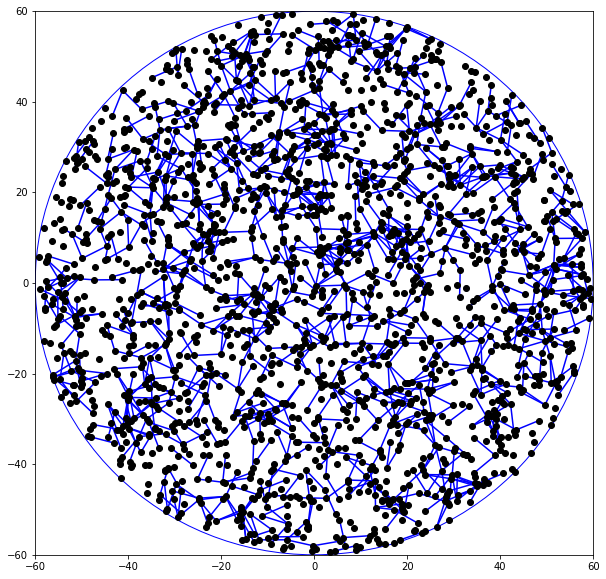

In [152]:

print(N_interacting_points(cluster, radius_shell, delta_shell))
print_cluster(cluster, radius_space)

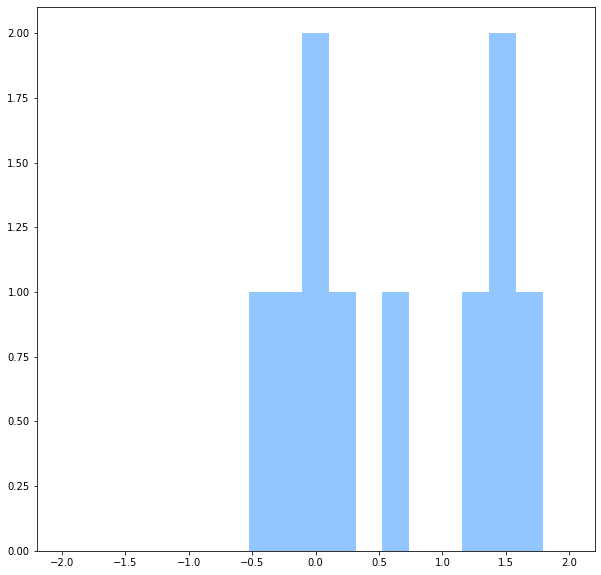

In [146]:
plt.hist(x, bins=np.linspace(-radius, radius, 20))
plt.show()